# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [3]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [4]:
x = dados.drop('inadimplente', axis =1)
y = dados['inadimplente']

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [7]:
print(f'Acurácia: {modelo.score(x,y)}')

Acurácia: 1.0


### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

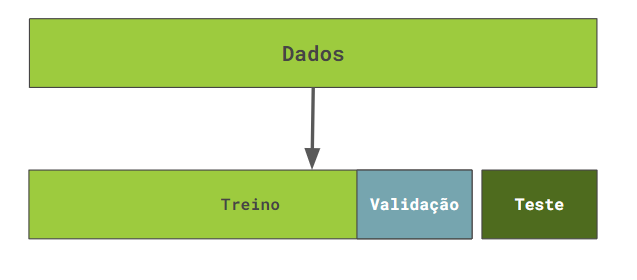

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [10]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8489678599425137


In [11]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205574912891986
Acurácia de validação: 0.9056702377841651


### Avaliando o modelo

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10359   120]
 [  963    39]]


In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

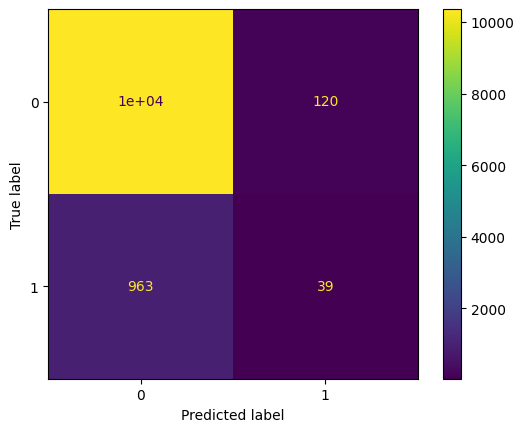

In [15]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualizacao.plot();

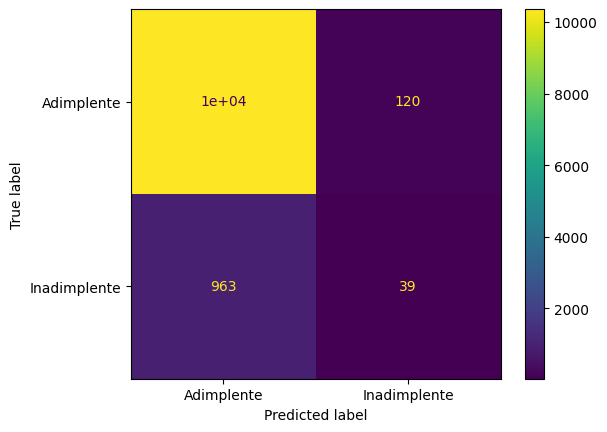

In [16]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

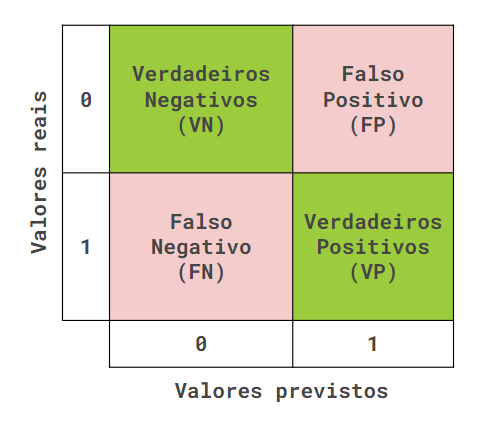

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9056702377841651


In [19]:
from sklearn.metrics import precision_score, recall_score

In [20]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Revocação: {recall_score(y_val, y_previsto)}')

Precisão: 0.24528301886792453
Revocação: 0.038922155688622756


In [21]:
from sklearn.metrics import f1_score

In [22]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.06718346253229975


### Curva ROC

In [23]:
from sklearn.metrics import RocCurveDisplay

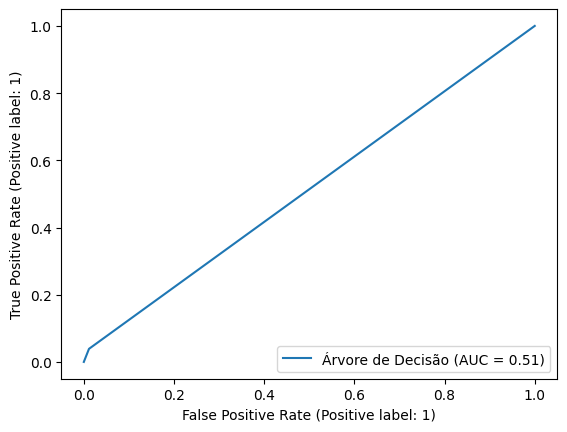

In [24]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5137353406556483


### Curva de precisão x recall

In [27]:
from sklearn.metrics import PrecisionRecallDisplay

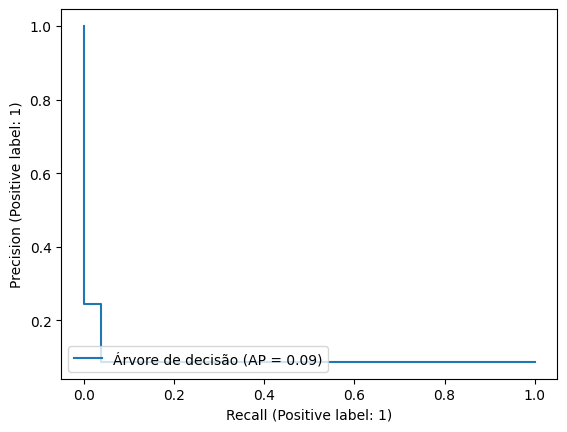

In [28]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [29]:
from sklearn.metrics import average_precision_score

In [30]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.09342465484893667


### Relatório de métricas

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a avaliação de desempenho será feita tirando a média da métrica de cada modelo. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

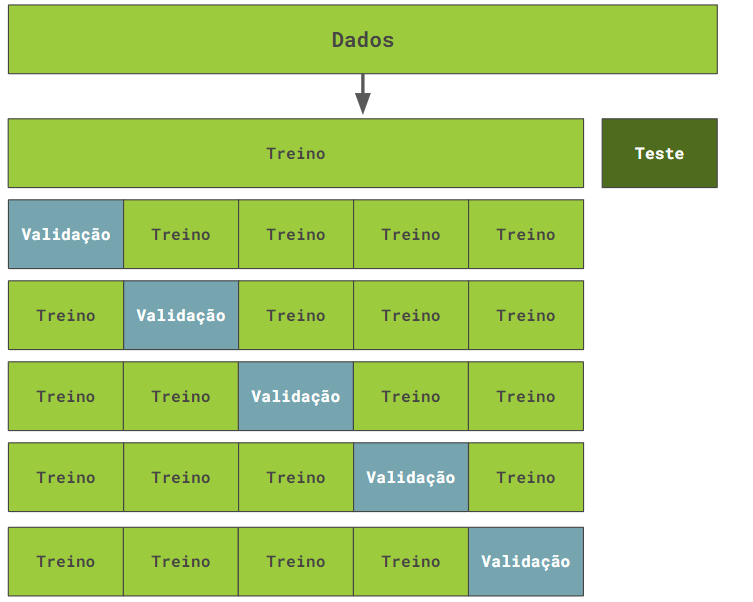

In [33]:
from sklearn.model_selection import cross_validate, KFold

In [34]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.23740792, 0.21299005, 0.22075653, 0.21707034, 0.21065998]),
 'score_time': array([0.00390935, 0.00384569, 0.0039804 , 0.00385022, 0.00543857]),
 'test_score': array([0.91246598, 0.9070122 , 0.90722997, 0.91310976, 0.89884582])}

In [35]:
cv_resultados['test_score']

array([0.91246598, 0.9070122 , 0.90722997, 0.91310976, 0.89884582])

In [36]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8974930092069496, 0.9179724757243598]


### Validação cruzada com recall

In [37]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [38]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.2190094 , 0.20586634, 0.21080422, 0.21392369, 0.20586586]),
 'score_time': array([0.01052284, 0.00677085, 0.00659442, 0.00657868, 0.01082897]),
 'test_score': array([0.02642008, 0.01856436, 0.0196802 , 0.0156658 , 0.02543353])}

In [39]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.012904413900403562, 0.029401168041219464]


### Estratificando os dados

In [40]:
dados['inadimplente'].value_counts(normalize = True)

0    0.912707
1    0.087293
Name: inadimplente, dtype: float64

In [41]:
from sklearn.model_selection import StratifiedKFold

In [42]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')

In [43]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.01530563507862015, 0.041563428218194]


## <font color='dark'>Balanceamento de dados</h1>

### Oversampling

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [46]:
y_balanceado.value_counts(normalize = True)

0    0.5
1    0.5
Name: inadimplente, dtype: float64

In [47]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv = skf, scoring = 'recall')

In [48]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7060717112685824, 0.7725966849325785]


### Pipeline para validação

In [49]:
from imblearn.pipeline import Pipeline as imbpipeline

In [50]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [51]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [52]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.19434095052168057, 0.2875753573353933]


### Undersampling

In [53]:
from imblearn.under_sampling import NearMiss

In [54]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

In [55]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6198778536492056, 0.7006329791315145]


### Testando o modelo

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



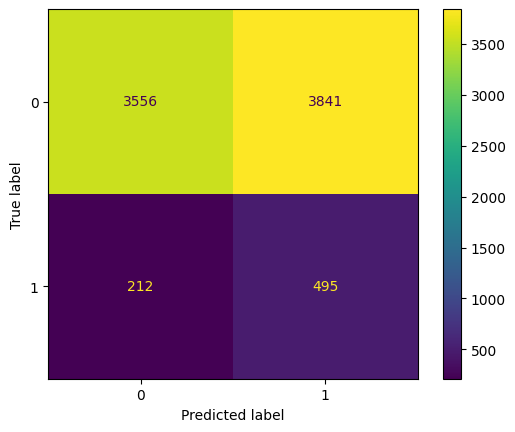

In [69]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);